# Fase 2: Visualización

- Usando las herramientas de visualización que has aprendido durante este módulo, contesta a las siguientes preguntas usando la mejor gráfica que consideres:

    * 1. ¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?

    * 2. ¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los cliente?

    * 3. ¿Cuál es la distribución de los clientes por provincia o estado?

    * 4. ¿Cómo se compara el salario promedio entre los diferentes niveles educativos de los clientes?

    * 5. ¿Cuál es la proporción de clientes con diferentes tipos de tarjetas de fidelidad?

    * 6. ¿Cómo se distribuyen los clientes según su estado civil y género?

# Importamos las librerías que necesitamos:

In [11]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Librerías de visualización
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

# Gestión de los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

In [20]:
# Cargamos los datos generados en la Fase 1

df_flight_activity_sin_duplicados = pd.read_csv("Customer_Flight_Activity_Sin_Duplicados", index_col=0)
df_loyalty = pd.read_csv("Customer_Loyalty_History_nonull.csv", index_col=0)
df_combinado = pd.read_csv("df_combinado.csv", index_col=0)

In [21]:
# Verificamos que se han subido correctamente

df_flight_activity_sin_duplicados.head()

,año,mes,vuelos_reservados,vuelos_con_acompañantes,vuelos_totales,distancia,puntos_acumulados,puntos_canjeados,costo_en_dolares_de_puntos_canjeados
numero_fidelizacion,,,,,,,,,
100018,2017,1,3,0,3,1521,152.0,0,0
100102,2017,1,10,4,14,2030,203.0,0,0
100140,2017,1,6,0,6,1200,120.0,0,0
100214,2017,1,0,0,0,0,0.0,0,0
100272,2017,1,0,0,0,0,0.0,0,0


In [22]:
df_loyalty.head()

,numero_fidelizacion,provincia,ciudad,codigo_postal,genero,educacion,salario,estado_civil,tarjeta_lealtad,valoracion_cliente,tipo_inscripcion,año_inscripcion,mes_inscripcion,año_cancelacion,mes_cancelacion
0,480934,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,0.0,0.0
1,549612,Alberta,Edmonton,T3G 6Y6,Male,College,73455.0,Divorced,Star,3839.61,Standard,2016,3,0.0,0.0
2,429460,British Columbia,Vancouver,V6E 3D9,Male,College,73455.0,Single,Star,3839.75,Standard,2014,7,2018.0,1.0
3,608370,Ontario,Toronto,P1W 1K4,Male,College,73455.0,Single,Star,3839.75,Standard,2013,2,0.0,0.0
4,530508,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.0,Married,Star,3842.79,Standard,2014,10,0.0,0.0


In [23]:
df_combinado.head()

,año,mes,vuelos_reservados,vuelos_con_acompañantes,vuelos_totales,distancia,puntos_acumulados,puntos_canjeados,costo_en_dolares_de_puntos_canjeados,provincia,ciudad,codigo_postal,genero,educacion,salario,estado_civil,tarjeta_lealtad,valoracion_cliente,tipo_inscripcion,año_inscripcion,mes_inscripcion,año_cancelacion,mes_cancelacion
numero_fidelizacion,,,,,,,,,,,,,,,,,,,,,,,
100018,2017,1,3,0,3,1521,152.0,0,0,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016,8,0,0
100102,2017,1,10,4,14,2030,203.0,0,0,Ontario,Toronto,M1R 4K3,Male,College,73455.0,Single,Nova,2887.74,Standard,2013,3,0,0
100140,2017,1,6,0,6,1200,120.0,0,0,British Columbia,Dawson Creek,U5I 4F1,Female,College,73455.0,Divorced,Nova,2838.07,Standard,2016,7,0,0
100214,2017,1,0,0,0,0,0.0,0,0,British Columbia,Vancouver,V5R 1W3,Male,Bachelor,63253.0,Married,Star,4170.57,Standard,2015,8,0,0
100272,2017,1,0,0,0,0,0.0,0,0,Ontario,Toronto,P1L 8X8,Female,Bachelor,91163.0,Divorced,Star,6622.05,Standard,2014,1,0,0


1. ¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?

In [29]:
# Agrupamos por 'Año' y 'Mes' y sumamos la cantidad de vuelos reservados

Vuelos_mensuales = df_flight_activity_sin_duplicados.groupby(['año', 'mes'])['vuelos_reservados'].sum().reset_index()
Vuelos_mensuales

,año,mes,vuelos_reservados
0,2017,1,47766
1,2017,2,47691
2,2017,3,64271
3,2017,4,55720
4,2017,5,65279
5,2017,6,80493
6,2017,7,89288
7,2017,8,78692
8,2017,9,63304
9,2017,10,60351


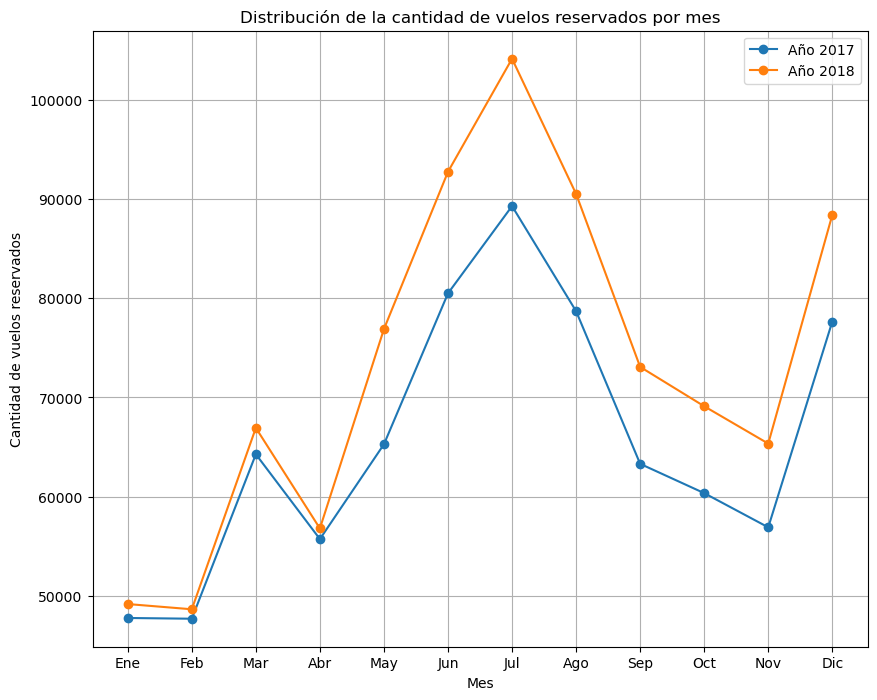

In [31]:
# Generamos la gráfica con la cantidad de vuelos reservados por mes durante el año

plt.figure(figsize=(10, 8))
for year in Vuelos_mensuales['año'].unique():
    subset = Vuelos_mensuales[Vuelos_mensuales['año'] == year]
    plt.plot(subset['mes'], subset['vuelos_reservados'], marker='o', label=f'Año {year}')

plt.title('Distribución de la cantidad de vuelos reservados por mes')
plt.xlabel('Mes')
plt.ylabel('Cantidad de vuelos reservados')
plt.xticks(ticks=list(range(1, 13)), labels=['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])
plt.legend()
plt.grid(True)
plt.show()

- El gráfico presentado muestra la evolución de la cantidad de vuelos reservados a lo largo de dos años consecutivos, 2017 y 2018. 

- Ambas líneas presentan un patrón similar, con un aumento significativo en los meses de verano (junio, julio y agosto) y una disminución en los meses de invierno (enero, febrero). Esto sugiere una estacionalidad en la demanda de vuelos, con mayor actividad durante los meses de vacaciones de verano. 

